## Mushroom

http://archive.ics.uci.edu/dataset/73/mushroom

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np 
from scipy import stats
from statsmodels import robust
import matplotlib.pyplot as plt
  
# fetch dataset 
m_shroom = fetch_ucirepo(id=73)
  
# data (as pandas dataframes) 
x = m_shroom.data.features 
y = m_shroom.data.targets

mushroom = pd.concat([x, y], axis=1)

# metadata 
print(m_shroom.metadata) 
  
# variable information 
print(m_shroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [2]:
x.head ()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [3]:
y.head ()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [4]:
# Creating numeric values 

# bruises: bruises(t): 1, no(f): 0
mushroom["bruises"] = mushroom["bruises"].replace({'t': 1, 'f': 0})

# gill-size: broad(b): 1, narrow(n): 0
mushroom["gill-size"] = mushroom["gill-size"].replace({'b': 1, 'n': 0})

# stalk-shape: enlarging(e): 1, tapering(t): 0
mushroom["stalk-shape"] = mushroom["stalk-shape"].replace({'e': 1, 't': 0})

# veil-type: partial(p): 1 universal(u): 0
mushroom["veil-type"] = mushroom["veil-type"].replace({'p': 1, 'u': 0})

# cap-shape: bell(b): 5, conical(c): 4, convex(x): 3, flat(f): 2, knobbed(k): 1, sunken(s): 0
mushroom["cap-shape"] = mushroom["cap-shape"].replace({'b': 5, 'c' : 4, 'x': 3, 'f': 2, 'k': 1, 's': 0})

# cap-surface: fibrous(f): 3, grooves(g): 2, scaly(y): 1, smooth(s): 0
mushroom["cap-surface"] = mushroom["cap-surface"].replace({'f': 3, 'g': 2, 'y': 1, 's': 0})

# cap-color: brown(n): 9, buff(b): 8, cinnamon(c): 7, gray(g): 6, green(r): 5, pink(p): 4, purple(u): 3, red(e): 2, white(w): 1, yellow(y): 0
mushroom["cap-color"] = mushroom["cap-color"].replace({'n': 9, 'b': 8, 'c': 7, 'g': 6, 'r': 5, 'p' : 4, 'u': 3, 'e': 2, 'w': 1, 'y': 0})

# odor: almond(a): 8, anise(l): 7, creosote(c): 6, fishy(y): 5, foul(f): 4, musty(m): 3, none(n): 2, pungent(p): 1, spicy(s): 0
mushroom["odor"] = mushroom["odor"].replace({'a': 8, 'l': 7, 'c': 6, 'y': 5, 'f' : 4, 'm': 3, 'n': 2, 'p': 1, 's': 0})

# gill-attachment: attached(a): 3, descending(d): 2, free(f): 1, notched(n): 0
mushroom["gill-attachment"] = mushroom["gill-attachment"].replace({'a': 3, 'd': 2, 'f': 1, 'n': 0})

# gill-spacing: close(c): 2, crowded(w): 1, distant(d): 0
mushroom["gill-spacing"] = mushroom["gill-spacing"].replace({'c': 2, 'w': 1, 'd': 0})

# gill-color: black(k): 11, brown(n): 10, buff(b): 9, chocolate(h): 8, gray(g): 7, green(r): 6,orange(o): 5, pink(p): 4, purple(u): 3, red(e): 2, white(w): 1, yellow(y): 0
mushroom["gill-color"] = mushroom["gill-color"].replace({'k': 11, 'n': 10, 'b': 9, 'h': 8, 'g': 7, 'r': 6, 'o': 5, 'p' : 4, 'u': 3, 'e': 2, 'w': 1, 'y': 0})

# stalk-root: bulbous(b): 6, club(c): 5, cup(u): 4, equal(e): 3, rhizomorphs(z): 2, rooted(r): 1, missing(?): 0
mushroom["stalk-root"] = mushroom["cap-shape"].replace({'b': 6, 'c': 5, 'u' : 4, 'e': 3, 'z': 2, 'r': 1, '?': 0})

# stalk-surface-above-ring: fibrous(f): 3, scaly(y): 2, silky(k): 1, smooth(s): 0
mushroom["stalk-surface-above-ring"] = mushroom["stalk-surface-above-ring"].replace({'f': 3, 'y': 2, 'k': 1, 's': 0})

# stalk-surface-below-ring: fibrous(f): 3, scaly(y): 2, silky(k): 1, smooth(s): 0
mushroom["stalk-surface-below-ring"] = mushroom["stalk-surface-below-ring"].replace({'f': 3, 'y': 2, 'k': 1, 's': 0})

# stalk-color-above-ring: brown(n): 8, buff(b): 7, cinnamon(c): 6, gray(g): 5, orange(o): 4, pink(p): 3, red(e): 2, white(w): 1, yellow(y): 0
mushroom["stalk-color-above-ring"] = mushroom["stalk-color-above-ring"].replace({'n': 8, 'b': 7, 'c': 6, 'g': 5, 'o': 4, 'p':  3, 'e': 2, 'w': 1, 'y': 0})

# stalk-color-below-ring: brown(n): 8, buff(b): 7, cinnamon(c): 6, gray(g): 5, orange(o): 4, pink(p): 3, red(e): 2, white(w): 1, yellow(y): 0
mushroom["stalk-color-below-ring"] = mushroom["stalk-color-below-ring"].replace({'n': 8, 'b': 7, 'c': 6, 'g': 5, 'o': 4, 'p':  3, 'e': 2, 'w': 1, 'y': 0})

# veil-color: brown(n): 3, orange(o): 2, white(w): 1, yellow(y): 0
mushroom["veil-color"] = mushroom["veil-color"].replace({'n': 3, 'o': 2, 'w': 1, 'y': 0})

# ring-number: none(n): 0, one(o): 1, two(t): 2
mushroom["ring-number"] = mushroom["ring-number"].replace({'t': 2, 'o': 1, 'n': 0})

# ring-type: cobwebby(c): 7, evanescent(e): 6, flaring(f): 5, large(l): 4, none(n): 3, pendant(p): 2, sheathing(s): 1, zone(z): 0
mushroom["ring-type"] = mushroom["ring-type"].replace({'c': 7, 'e': 6, 'f': 5, 'l' : 4, 'n': 3, 'p': 2, 's': 1, 'z': 0})

# spore-print-color: black(k): 8, brown(n): 7, buff(b): 6, chocolate(h): 5, green(r): 4, orange(o): 3, purple(u): 2, white(w): 1, yellow(y): 0
mushroom["spore-print-color"] = mushroom["spore-print-color"].replace({'k': 8, 'n': 7, 'b': 6, 'h': 5, 'r': 4, 'o':  3, 'u': 2, 'w': 1, 'y': 0})

# population: abundant(a): 5, clustered(c): 4, numerous(n): 3, scattered(s): 2, several(v): 1, solitary(y): 0
mushroom["population"] = mushroom["population"].replace({'a': 5, 'c' : 4, 'n': 3, 's': 2, 'v': 1, 'y': 0})

# habitat: grasses(g): 6, leaves(l): 5 , meadows(m): 4, paths(p): 3, urban(u): 2, waste(w): 1, woods(d): 0
mushroom["habitat"] = mushroom["habitat"].replace({'g': 6, 'l': 5, 'm' : 4, 'p': 3, 'u': 2, 'w': 1, 'd': 0})

#TARGET: poisonous(p): 1, eadible (e): 0
mushroom["poisonous"] = mushroom["poisonous"].replace({'p': 1, 'e': 0})

mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,3,0,9,1,1,1,2,0,11,1,...,1,1,1,1,1,2,8,2,2,1
1,3,0,0,1,8,1,2,1,11,1,...,1,1,1,1,1,2,7,3,6,0
2,5,0,1,1,7,1,2,1,10,1,...,1,1,1,1,1,2,7,3,4,0
3,3,1,1,1,1,1,2,0,10,1,...,1,1,1,1,1,2,8,2,2,1
4,3,0,6,0,2,1,1,1,11,0,...,1,1,1,1,1,6,7,5,6,0


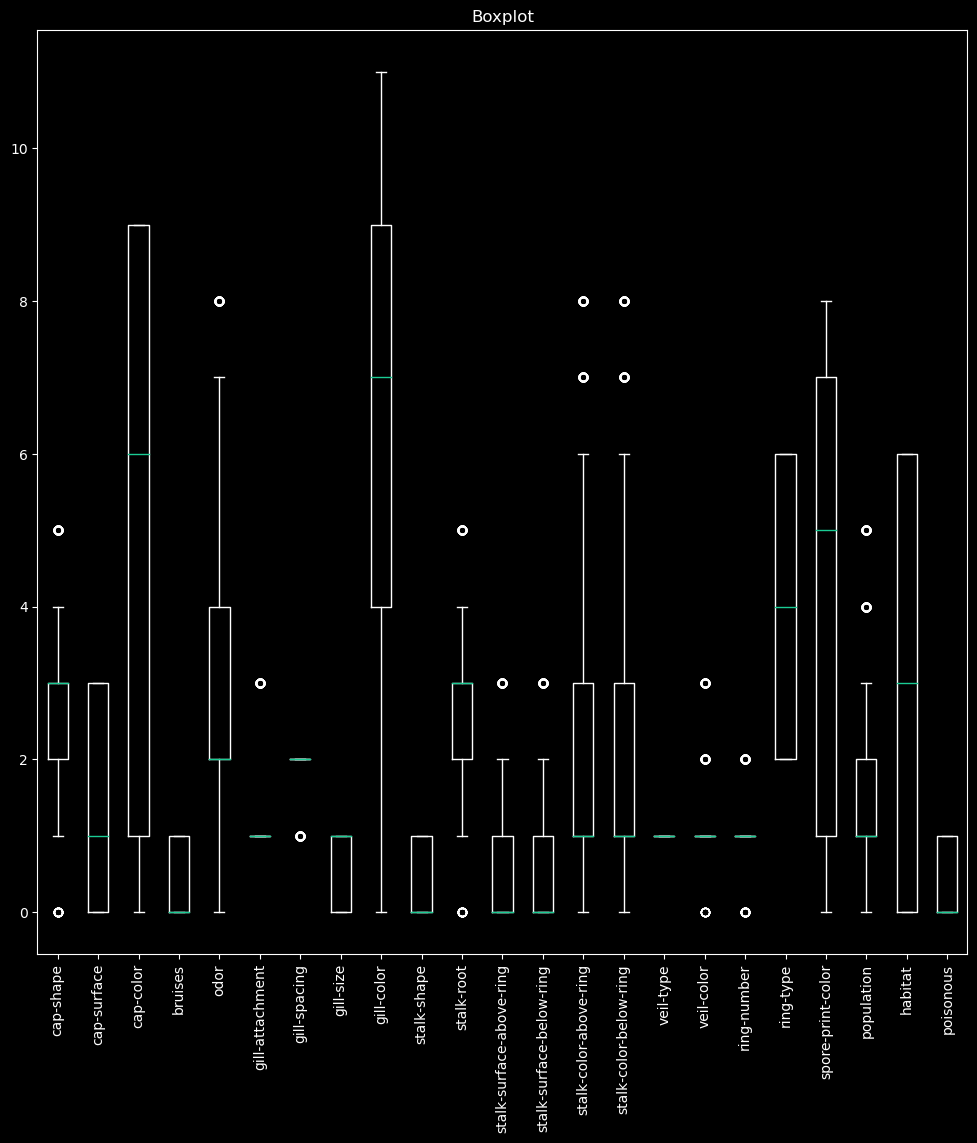

In [5]:
# Boxplots
plt.figure(figsize=(12,12))
plt.title("Boxplot")
plt.boxplot(mushroom,labels=mushroom.columns,medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=90)
plt.show()

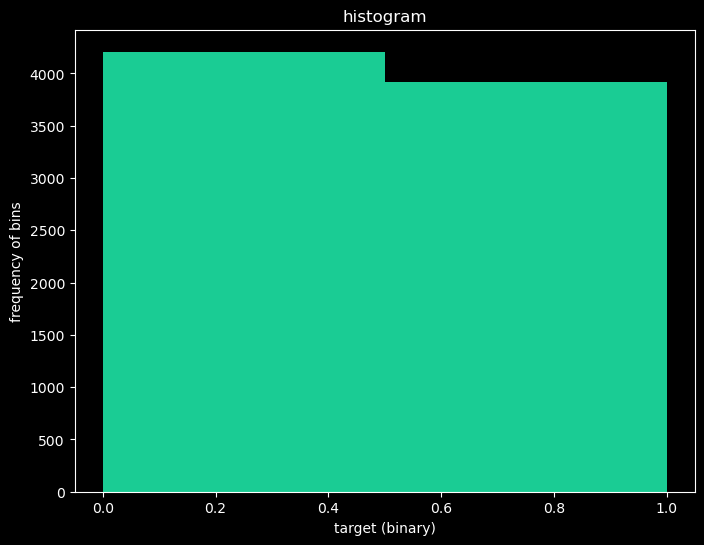

In [6]:
# Historgram
plt.figure(figsize=(8,6))
plt.title("histogram")
plt.hist(mushroom["poisonous"],bins=2,color="#1ACC94")
plt.ylabel("frequency of bins")
plt.xlabel("target (binary)")
plt.show()

/var/folders/_s/1t0lm39d5b1bl47vd_q5jfth0000gn/T/ipykernel_6690/3048233681.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(mushroom["habitat"])


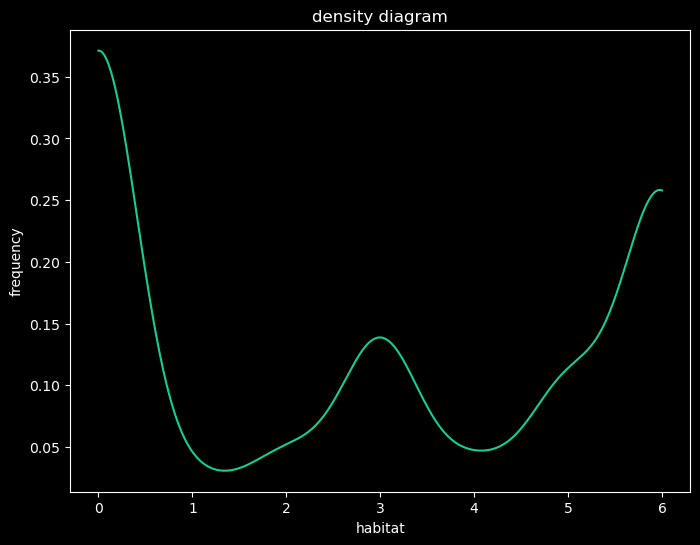

In [7]:
# density diagram
density = stats.kde.gaussian_kde(mushroom["habitat"])
x = np.linspace(mushroom["habitat"].min(),mushroom["habitat"].max(),500)

plt.figure(figsize=(8,6))
plt.title("density diagram")
plt.plot(x, density(x),color="#1ACC94")
plt.ylabel("frequency")
plt.xlabel("habitat")
plt.show()

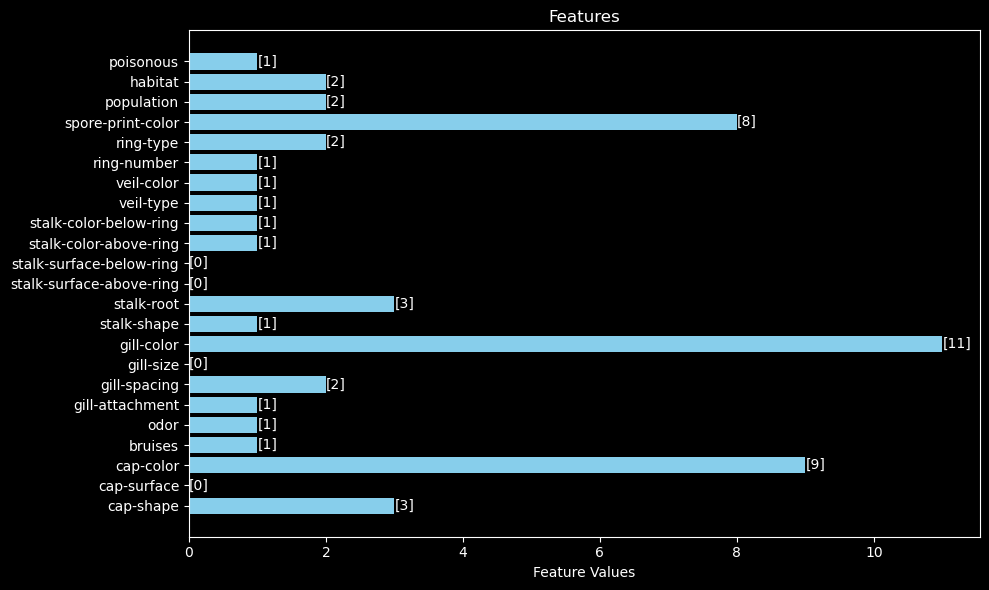

In [8]:
features = mushroom.columns
feature_values = mushroom.values.reshape(-1, 1)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for each feature
for i, feature in enumerate(features):
    ax.barh(i, feature_values[i], color='skyblue')
    ax.text(feature_values[i], i, str(feature_values[i]), ha='left', va='center')

# Setting y-axis ticks and labels
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)

# Setting labels and title
ax.set_xlabel("Feature Values")
ax.set_title('Features')

# Show plot
plt.tight_layout()
plt.show()

/Users/Pudzich/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/Pudzich/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/Pudzich/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='cap-shape', ylabel='cap-shape'>,
        <Axes: xlabel='cap-surface', ylabel='cap-shape'>,
        <Axes: xlabel='cap-color', ylabel='cap-shape'>,
        <Axes: xlabel='bruises', ylabel='cap-shape'>,
        <Axes: xlabel='odor', ylabel='cap-shape'>,
        <Axes: xlabel='gill-attachment', ylabel='cap-shape'>,
        <Axes: xlabel='gill-spacing', ylabel='cap-shape'>,
        <Axes: xlabel='gill-size', ylabel='cap-shape'>,
        <Axes: xlabel='gill-color', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-shape', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-root', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-surface-above-ring', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-surface-below-ring', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-color-above-ring', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-color-below-ring', ylabel='cap-shape'>,
        <Axes: xlabel='veil-type', ylabel='cap-shape'>,
        <Axes: xlabel='veil-color', ylab

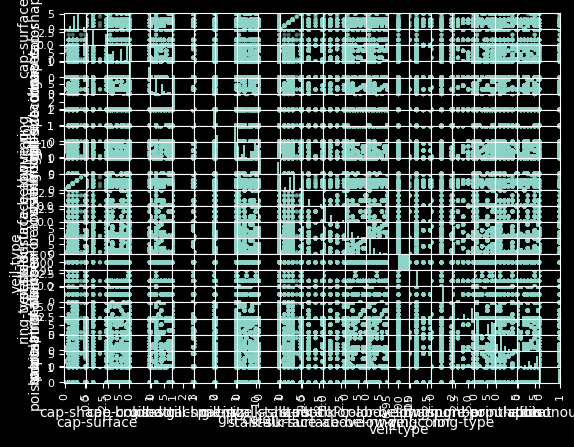

In [9]:
# Scatterplot

pd.plotting.scatter_matrix(mushroom)

## Correlations for weighted x-values

In [10]:
# correlations
corr_matrix = mushroom.corr()
corr_matrix

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
cap-shape,1.000000,-0.007059,-0.176574,0.199703,0.251055,0.032099,-0.061368,0.259001,-0.069180,0.248495,...,-0.059667,-0.067470,NaN,0.036995,0.069245,-0.304673,0.251207,0.129000,0.134210,-0.199488
cap-surface,-0.007059,1.000000,-0.022923,0.019547,-0.105749,-0.161757,-0.096076,0.274933,-0.122924,0.037139,...,0.250617,0.260090,NaN,-0.154804,-0.060429,-0.171361,0.310188,-0.188979,-0.191609,-0.186806
cap-color,-0.176574,-0.022923,1.000000,-0.034513,-0.318907,0.192322,0.023269,-0.091914,-0.020306,-0.240248,...,-0.044439,-0.025502,NaN,0.188903,-0.010226,0.088491,-0.079787,-0.017712,-0.089724,-0.058452
bruises,0.199703,0.019547,-0.034513,1.000000,0.079235,-0.137359,0.299473,0.369596,-0.348658,-0.099364,...,-0.197177,-0.213054,NaN,-0.119770,0.056788,-0.692973,0.519982,-0.088137,-0.305354,-0.501530
odor,0.251055,-0.105749,-0.318907,0.079235,1.000000,-0.092471,0.114297,0.037037,0.074913,0.344635,...,-0.012270,-0.026790,NaN,-0.086768,-0.164708,-0.161269,0.093370,0.003753,0.126054,0.086800
gill-attachment,0.032099,-0.161757,0.192322,-0.137359,-0.092471,1.000000,0.071489,0.108984,-0.080726,0.186485,...,0.122946,0.116158,NaN,0.897518,-0.093236,-0.146689,-0.068909,0.165575,0.115387,-0.129200
gill-spacing,-0.061368,-0.096076,0.023269,0.299473,0.114297,0.071489,1.000000,-0.108333,-0.037735,0.080895,...,0.319259,0.271301,NaN,0.073363,-0.243014,-0.195897,-0.092992,-0.529253,-0.397884,0.348387
gill-size,0.259001,0.274933,-0.091914,0.369596,0.037037,0.108984,-0.108333,1.000000,-0.330580,0.214576,...,0.271111,0.228629,NaN,0.103809,0.171362,-0.460872,0.549444,0.147682,0.088058,-0.540024
gill-color,-0.069180,-0.122924,-0.020306,-0.348658,0.074913,-0.080726,-0.037735,-0.330580,1.000000,-0.185632,...,-0.064741,-0.101458,NaN,-0.048532,-0.235151,0.389234,-0.144126,0.027168,0.185011,0.270247
stalk-shape,0.248495,0.037139,-0.240248,-0.099364,0.344635,0.186485,0.080895,0.214576,-0.185632,1.000000,...,0.228784,0.251239,NaN,0.162604,0.293221,-0.291444,0.038177,0.087383,0.239285,0.102019


In [11]:
# Filter out correlations where both features are the same (correlation equals 1)
mask = np.eye(len(corr_matrix), dtype=bool)
filtered_corr = corr_matrix.mask(mask)

# Find correlations greater than or equal to 0.5
high_corr = filtered_corr[filtered_corr >= 0.5].stack().reset_index()

high_corr.head (20)

,level_0,level_1,0
0,cap-shape,stalk-root,1.000000
1,bruises,spore-print-color,0.519982
2,gill-attachment,veil-color,0.897518
3,gill-size,spore-print-color,0.549444
4,stalk-root,cap-shape,1.000000
5,stalk-color-above-ring,stalk-color-below-ring,0.634053
6,stalk-color-below-ring,stalk-color-above-ring,0.634053
7,veil-color,gill-attachment,0.897518
8,spore-print-color,bruises,0.519982
9,spore-print-color,gill-size,0.549444


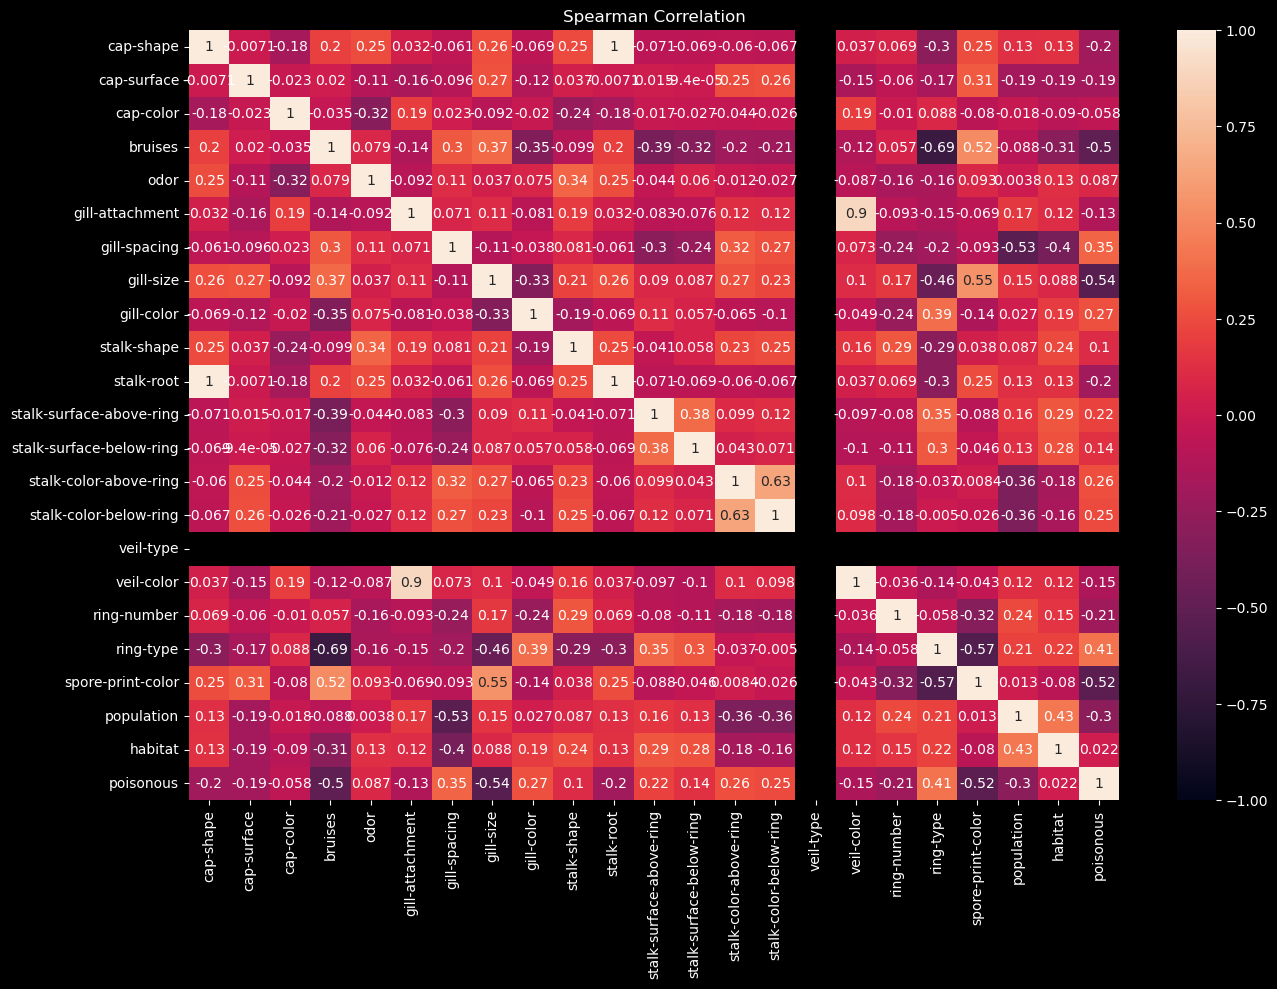

In [12]:
# Visualization of correlations with Spearman
import seaborn as sns

def display_correlation(mushroom):
    r = mushroom.corr(method="spearman")
    plt.figure(figsize=(15,10))
    heatmap = sns.heatmap(mushroom.corr(), vmin=-1, vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple = display_correlation(mushroom)